In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Explore the dataset

In [ ]:
uploaded = files.upload()
df = pd.read_csv("aerofit_treadmill.csv")
df.head()

Saving aerofit_treadmill.csv to aerofit_treadmill (1).csv


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.shape

(180, 9)

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Insights :


1.   Age - Even though the oldest person is 50 years old, the mean and median of the data lies between 25 to 30 years old. This is the age where people take fitness seriously and work on it.
2.   Education - we have mean and median around 16 years, ranging from 12 to 21.
3.   Usage - Most of the customer are using treadmill 3 times a week.
4.   Fitness - fitness rating of most of the customers in 3.3/5
5.  Inclome - On an average evry customer earns 50K $ per year.
6.  Miles - 94 to 104 miles customer expact to run/walk on treadmill every week



In [ ]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


Every data is completely available. there is no empty cell in data set.

## 2. Detect Outliers

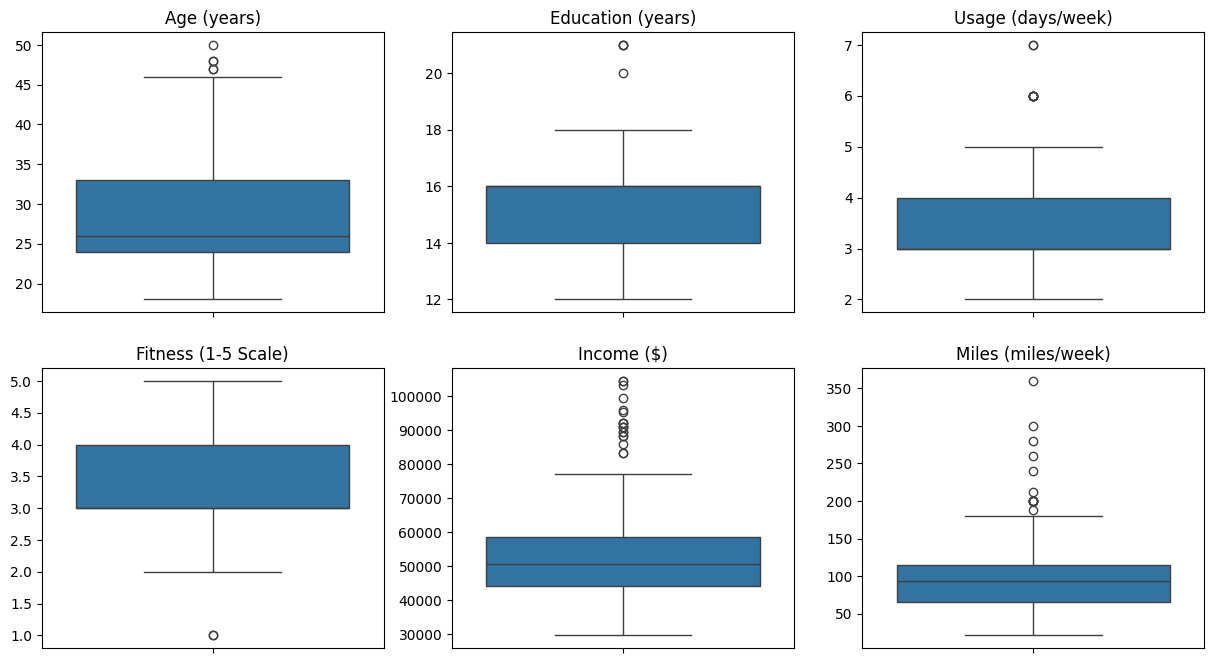

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.boxplot(data=df,y="Age")
plt.title("Age (years)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,2)
sns.boxplot(data=df,y="Education")
plt.title("Education (years)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,3)
sns.boxplot(data=df,y="Usage")
plt.title("Usage (days/week)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,4)
sns.boxplot(data=df,y="Fitness")
plt.title("Fitness (1-5 Scale)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,5)
sns.boxplot(data=df,y="Income")
plt.title("Income ($)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,6)
sns.boxplot(data=df,y="Miles")
plt.title("Miles (miles/week)")
plt.xlabel("")
plt.ylabel("")
plt.show()



1.   Age - there are three customers who are above 45 years. these are good outliers and can motivate new customer in that range.
2.   Education - Only two customers have education of 20 years and more.
3.   Usage - One customer each who practices treadmill 6 and 7 days respectively.
4.  Fitness - There is only one outlier at rating 1/5, might be a new customer who want to shift up the ladder of fitness, we can target more of that range.
5. Income - Many outliers on the higher income range, but no outlier in lower range.
6.  Miles - Few customers are using treadmill to higher extent, which is above 350 miles per week. this can be used to design treadmill for durability.



## Remove the outliers to assess the data better :

In [ ]:
df1 = df.copy()
for col in ["Age","Education","Usage","Fitness","Income","Miles"]:
  lower = np.percentile(df1[col],5)
  upper = np.percentile(df1[col],95)
  df1[col]=np.clip(df1[col],lower,upper)

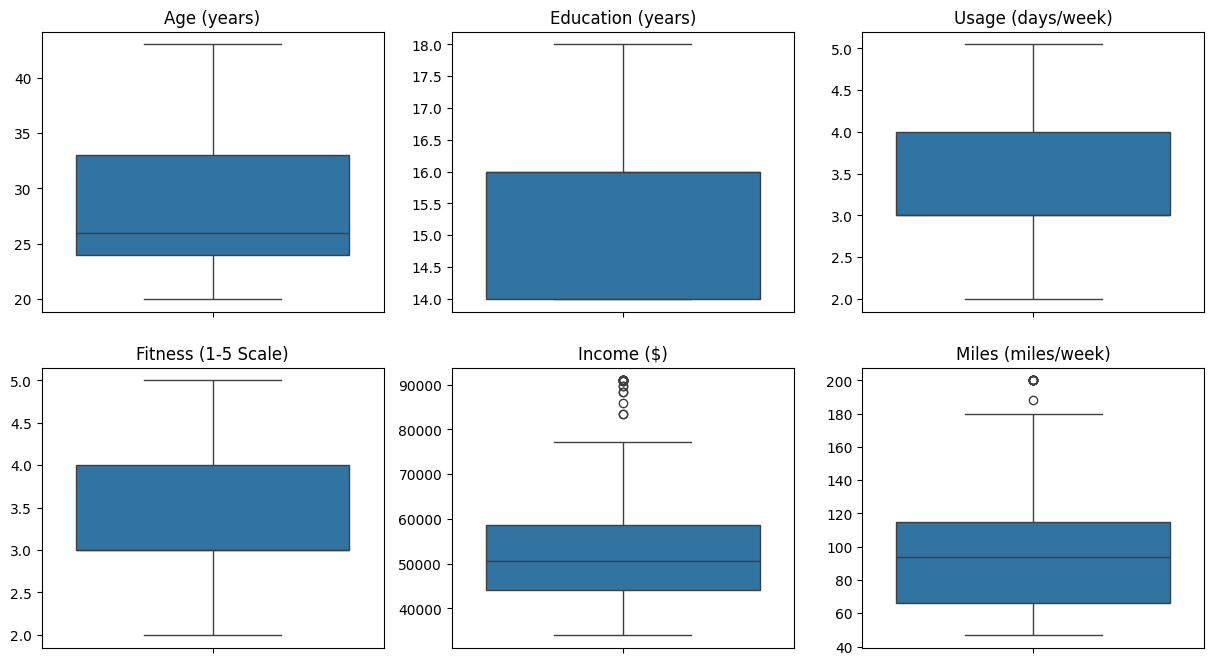

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.boxplot(data=df1,y="Age")
plt.title("Age (years)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,2)
sns.boxplot(data=df1,y="Education")
plt.title("Education (years)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,3)
sns.boxplot(data=df1,y="Usage")
plt.title("Usage (days/week)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,4)
sns.boxplot(data=df1,y="Fitness")
plt.title("Fitness (1-5 Scale)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,5)
sns.boxplot(data=df1,y="Income")
plt.title("Income ($)")
plt.xlabel("")
plt.ylabel("")
plt.subplot(2,3,6)
sns.boxplot(data=df1,y="Miles")
plt.title("Miles (miles/week)")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [ ]:
df1.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.641389,15.572222,3.396944,3.322222,53477.070000,101.088889
std,6.446373,1.362017,0.952682,0.937461,15463.662523,43.364286
min,20.000000,14.000000,2.000000,2.000000,34053.150000,47.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,43.050000,18.000000,5.050000,5.000000,90948.250000,200.000000


### 3. Check if features like marital status, Gender, and age have any effect on the product purchased

Text(0, 0.5, 'Miles')

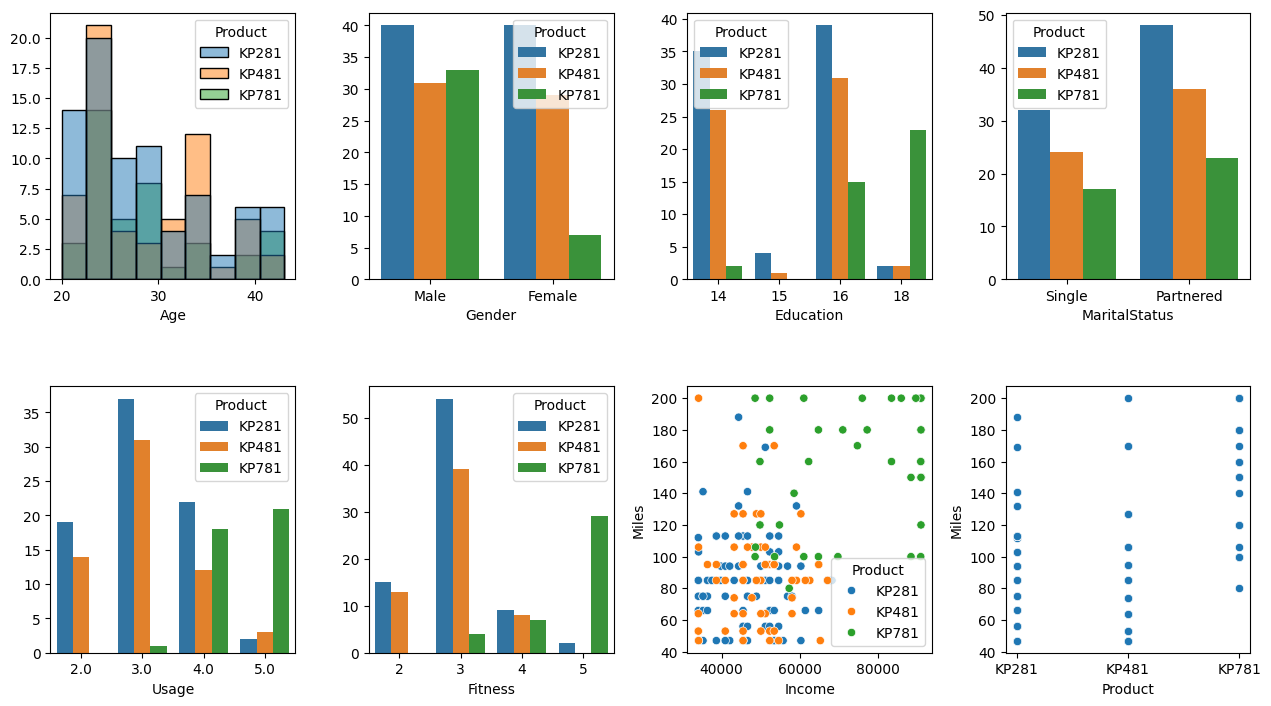

In [ ]:
df1 = pd.DataFrame(df1)
plt.figure(figsize=(15,8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,
                    wspace=0.3, hspace=0.4)
plt.subplot(2,4,1)
sns.histplot(data=df1,hue="Product",x="Age")
plt.ylabel("")
plt.subplot(2,4,2)
sns.countplot(data=df1,x="Gender", hue="Product")
plt.ylabel("")
plt.subplot(2,4,3)
sns.countplot(data=df1,x="Education", hue="Product")
plt.ylabel("")
plt.subplot(2,4,4)
sns.countplot(data=df1,x="MaritalStatus", hue="Product")
plt.ylabel("")
plt.subplot(2,4,5)
df1["Usage"]=df1["Usage"].round(0)
plt.ylabel("")
sns.countplot(data=df1,x="Usage", hue="Product")
plt.ylabel("")
plt.subplot(2,4,6)
sns.countplot(data=df1,x="Fitness", hue="Product")
plt.ylabel("")
plt.subplot(2,4,7)
sns.scatterplot(data=df1,x="Income", y="Miles",hue="Product")
plt.ylabel("Miles")
plt.subplot(2,4,8)
sns.scatterplot(data=df1,y="Miles",x="Product")
plt.ylabel("Miles")

Age countplot :            
Insights - KP281 is evenly distrinuted among all age groups where as KP781 is distributed among lower age groups.
Recommendation - KP781 can be marketed among the higher age group.

Gender countplot :           
Insights - KP781 is not popular among the female customers. KP281 is most popular treadmill among both males and females. Value for money could be the factor.
Recommendation - Promote KP781 to female customers, understand their need by doing customer servey.

Education countplot:    
Insights - Higher educated people tend to choose KP781 which is good. KP281 is more famous among comparatively less educated people.
Recommendation - KP281 can be targeted to college graduates, KP481 for educated working proffesionals and KP781 is premium product for highly educated professionals like doctors, engineers

Marital Status countplot :     
Insights - SIngles prefer KP281 whereas married prefers KP481 and KP781
Recommendation - KP281 target for single affordable choice and KP781 and KP481 for family investment

Usage :    
Insights - KP781 buyers show heavy usage whereas KP481 and KP281 use it moderately.
Recommendation - targeting audience, KP281 is for casual fitness enthusiast, KP481 is for moderate fitness practicioner and KP781 is for highly active users

Fitness :     
Insights - KP781 users show fitness with highest level where as KP481 and KP281 show moderate and beginner respectively
Recommendation - KP281 targets beginners for fitness excercises, KP481 can be targeted to moderately fit people who want to improve where as KP781 can be targeted to highly fit people.

Income :          
Insights - KP281 clustters around lower middle inclomes, KP481 clustters around middle income whereas KP781 is on higher income side
Recommendation - KP281 targets to lower middle income range, KP581 targets middle income range and KP781 to higher income range

Miles :      
Insight - KP781 shows higher miles usage as compared to KP281 and KP481
Recommendation - Target KP781 to the highly active users where as KP281 for beginners and KP481 for moderate users

### 4. Representing the Probability

In [ ]:
print(pd.crosstab(df1["Product"], df1["Gender"],margins=True,normalize="index").round(2))

Gender   Female  Male
Product              
KP281      0.50  0.50
KP481      0.48  0.52
KP781      0.18  0.82
All        0.42  0.58


Insights :                  
KP281 → 50-50 split, equal appeal.
KP481 → Slightly more male (52%).
KP781 → Strong male bias (82%).
Overall → Market is male-heavy (58%).

Recommendations :              
KP281 → Market as a unisex product.
KP481 → Keep balanced promotions, add features to attract more women.
KP781 → Focus on male-centric campaigns; redesign if targeting women.
Overall → Prioritize men but explore female-focused campaigns to expand reach.

In [ ]:
pd.crosstab(index=df1["Product"],columns="count",normalize=True).round(2)

col_0,count
Product,
KP281,0.44
KP481,0.33
KP781,0.22


Insights :         
KP281 - Most popular product, almost every second customer choose this.
KP481 - Secondmost popular with 33% people choose this product
KP781 - almost one in four have chosen this product, as most of customers are not highly active users.


Recommendations -
KP281 - Maintain strong supply and maintainance along with wider marketing
KP481 - Market as upgrade option for KP281 users
KP781 - Target it to higly active people in fitness with branding and offers


Insights :        


In [ ]:
print(pd.crosstab(df1["Product"], df1["MaritalStatus"],margins=True,normalize="index").round(2))

MaritalStatus  Partnered  Single
Product                         
KP281               0.60    0.40
KP481               0.60    0.40
KP781               0.57    0.42
All                 0.59    0.41


Insights :        
Across all products, Partnered customers dominate (~59–60%).
Single customers form ~40%, fairly consistent across all products.
No major product-specific variation → marital status does not strongly differentiate product choice.

Recommendations :               
Focus campaigns on partnered households (e.g., “Fitness for couples/families”).
For singles (~40%), emphasize individual goals & independence (e.g., “Your personal fitness companion”).
Since the split is stable, marital status is not a major deciding factor — can be used as a secondary segmentation.



In [ ]:
print(pd.crosstab(df1["Product"], df1["Usage"],margins=True,normalize="index").round(2))

Usage     2.0   3.0   4.0   5.0
Product                        
KP281    0.24  0.46  0.28  0.02
KP481    0.23  0.52  0.20  0.05
KP781    0.00  0.02  0.45  0.52
All      0.18  0.38  0.29  0.14


Insights :      
KP281 → Most customers use it 3 times/week (46%), moderate for 2–4 times, very low daily use.

KP481 → Similar to KP281, but slightly higher 3 times/week usage (52%).

KP781 → Heavy-use product → 45% use 4 times/week, 52% daily.

Overall → Majority use products 3–4 times/week (67%), only 14% daily users.

Recommedations :       
KP281 & KP481 → Market as consistent, moderate-usage equipment for routine fitness.

KP781 → Position as a high-performance product for serious/committed users.

Overall → Promote “3–4 times/week” usage as the ideal fitness routine, while targeting KP781 campaigns to hardcore/daily fitness enthusiasts.

In [ ]:
print(pd.crosstab(df1["Product"], df1["Fitness"],margins=True,normalize="index").round(2))

Fitness     2     3     4     5
Product                        
KP281    0.19  0.68  0.11  0.02
KP481    0.22  0.65  0.13  0.00
KP781    0.00  0.10  0.18  0.72
All      0.16  0.54  0.13  0.17


Insights :            
KP281 → Majority (68%) are at fitness level 3 → mid-level users. Very few advanced (5).

KP481 → Similar profile → 65% at level 3, moderate presence at level 2 & 4.

KP781 → Clear skew toward advanced users (72% at level 5) → designed for highly fit customers.

Overall → Market dominated by level 3 (54%), with a significant advanced group (17%).

Recommendations :         
KP281 & KP481 → Market as best for intermediate users, emphasize accessibility and ease of use.

KP781 → Position as a premium, advanced product for high-performance athletes.

Overall → Entry-to-mid-level fitness (level 2–3) is the core audience, but a premium segment (level 5) exists and can be targeted with exclusive campaigns.

### 5.Check the correlation among different factors

<Axes: >

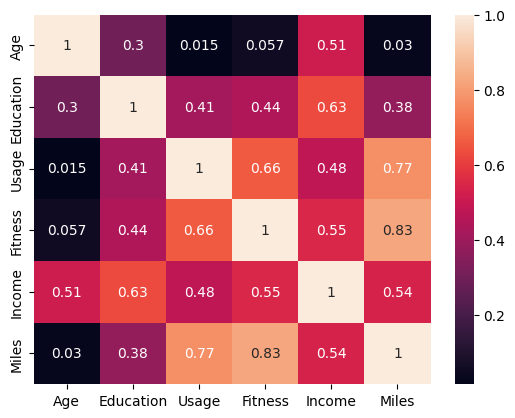

In [ ]:
df2=df1[["Age","Education","Usage","Fitness","Income","Miles"]]
sns.heatmap(df2.corr(),annot=True)

Insights :        
Fitness & Miles (0.83) – People who are more fit usually cover more miles.

Usage & Miles (0.77) – The more someone uses the product, the more miles they cover.

Usage & Fitness (0.66) – People who use the product more often are usually more fit.

Education & Income (0.63) – People with higher education usually earn more money.

Income with Fitness (0.55) and Miles (0.54) – Richer people are a little more fit and cover more miles.

Age – Age does not have much effect, except it is a bit linked with income (0.51).


Recommendations :    
Focus on fitness lovers → People who use the machines a lot and are already fit (like KP781 buyers) should be given special attention.

Encourage regular use → If people with KP281/481 use the machines more, they will get fitter and cover more miles. Later, they may buy advanced machines.

Target higher-income people → They are more active, so KP781 can be sold to them as a premium (high-quality) product.

Don’t focus too much on age → Marketing should be based on fitness goals and lifestyle, not just on how old someone is.
